# グラフ理論入門

## 4.4.1 グラフとは？

### グラフ描画の例（p. 95）

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

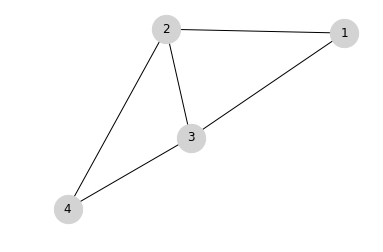

In [2]:
G=nx.Graph()
vlist = [1,2,3,4]
elist = [(1,2), (1,3), (2,3),(2,4),(3,4)]
G.add_nodes_from(vlist)
G.add_edges_from(elist)
nx.draw_networkx(G, node_color='lightgray', node_size=800)
plt.axis('off')
#plt.savefig('../fig/graph1.eps')
plt.show()

### グラフの属性（p. 96）

In [3]:
print('Gの頂点のリスト:', G.nodes())
print('Gの頂点の数：', G.number_of_nodes())
print('Gの頂点:1に隣接する頂点のリスト:',
              [v for v in nx.all_neighbors(G,1)])

Gの頂点のリスト: [1, 2, 3, 4]
Gの頂点の数： 4
Gの頂点:1に隣接する頂点のリスト: [2, 3]


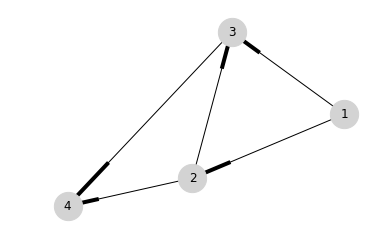

In [4]:
DG=nx.DiGraph()
vlist = [1,2,3,4]
elist = [(1,2), (1,3), (2,3),(2,4),(3,4)]
DG.add_nodes_from(vlist)
DG.add_edges_from(elist)
nx.draw_networkx(DG, node_color='lightgrey', node_size=800)
plt.axis('off')
#plt.savefig('../fig3/digraph1.eps')
plt.show()

In [5]:
print('DGの枝のリスト:', DG.edges())
print('DGの枝の数：', DG.number_of_edges())

DGの枝のリスト: [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
DGの枝の数： 5


In [6]:
G = nx.MultiGraph()
G.add_edges_from([(1,2),(1,3),(3,1),(2,3),(2,2)])
A = nx.adjacency_matrix(G)
M = nx.incidence_matrix(G)
print('A =', A.toarray())
print('M =', M.toarray())

A = [[0 1 2]
 [1 1 1]
 [2 1 0]]
M = [[ 1.  1.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.]
 [ 0.  1.  1.  1.  0.]]


In [7]:
G = nx.MultiDiGraph()
G.add_edges_from([(1,2),(1,3),(3,1),(2,3),(2,3),(2,2)])
A = nx.adjacency_matrix(G)
M = nx.incidence_matrix(G, oriented=True)
print('A =', A.toarray())
print('M =', M.toarray())

A = [[0 1 1]
 [0 1 2]
 [1 0 0]]
M = [[-1. -1.  0.  0.  0.  1.]
 [ 1.  0. -1. -1.  0.  0.]
 [ 0.  1.  1.  1.  0. -1.]]


## 4.1.2 様々なグラフ

### 完全グラフ（p. 98）

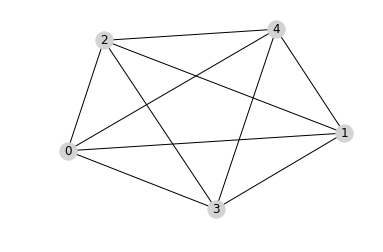

In [8]:
G = nx.complete_graph(5) 
p = nx.spring_layout(G, iterations=100)
nx.draw_networkx(G,pos=p,node_color='lightgrey',node_size=300)
plt.axis('off')
plt.show()

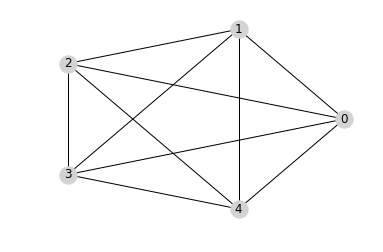

In [9]:
G = nx.complete_graph(5) 
p = nx.circular_layout(G)
nx.draw_networkx(G,pos=p,node_color='lightgrey',node_size=300)
plt.axis('off')
plt.show()

### 完全2部グラフ（pp. 98-99）

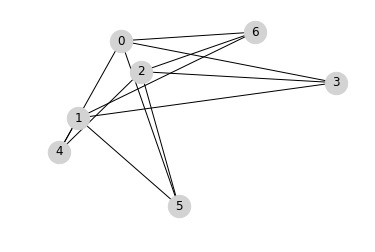

In [10]:
m,n = 3,4
G=nx.complete_bipartite_graph(m,n)
nx.draw_networkx(G,pos=nx.random_layout(G),
                 node_color='lightgrey', node_size=500)
plt.axis('off')
plt.show()

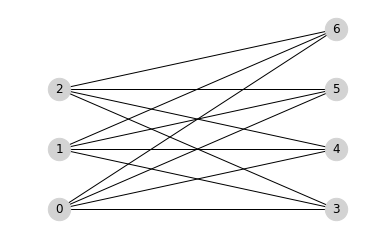

In [11]:
m,n = 3,4
G=nx.complete_bipartite_graph(m,n)
p = {}
for i in range(m):
    p[i] = (0,i)
for i in range(n):
    p[m+i] = (1,i)
nx.draw_networkx(G,pos=p,node_color='lightgrey',node_size=500)
plt.axis('off')
plt.show()


## 4.1.3 次数，同型性，部分グラフ

### 次数

In [12]:
G = nx.random_geometric_graph(100,0.1)

print('次数の合計:', sum(nx.degree(G,v) for v in G.nodes()))
print('枝の数の2倍:', 2*len(G.edges()))
print('奇点の数:', len([v for v in G.nodes() if nx.degree(G,v)%2 == 1]))

次数の合計: 242
枝の数の2倍: 242
奇点の数: 50


### 同型性チェック（p. 102）

In [13]:
G1=nx.Graph()
G1.add_edges_from([(1,4),(1,5),(1,6),(2,4),
               (2,5),(2,6),(3,4),(3,5),(4,6)])
G2=nx.Graph()
G2.add_edges_from([('a','b'),('a','d'),('a','f'),('b','c'),
               ('a','e'),('c','d'),('c','f'),('d','e'),('e','f'),])
G3=nx.Graph()
G3.add_edges_from([('x','z'),('x','y'),('y','z'),('x','u'),
               ('y','v'),('z','w'),('u','v'),('v','w'),('w','u'),])

print(nx.is_isomorphic(G1,G2))
print(nx.is_isomorphic(G1,G3))

True
False


### 部分グラフ（p. 103）

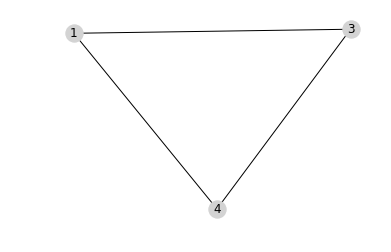

In [14]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,4),(3,4)])
G1=G.subgraph((1,3,4))
nx.draw_networkx(G1, node_color='lightgray')
plt.axis('off')
plt.show()

# 4.1.4 経路，閉路，パス，サイクル

### パスと連結性（p. 104）

In [15]:
G = nx.path_graph(4)
G.add_path([10, 11, 12])
print(nx.is_connected(G))
for c in nx.connected_components(G):
    print(c)

False
{0, 1, 2, 3}
{10, 11, 12}


### Primのアルゴリズムの実装（pp. 107-108）

In [16]:
def prim(G):
    V = [v for v in G.nodes()]
    n = len(V)
    T = []
    S = [V[0]]
    while len(S) < n:
        candidates = [(u,v,w['weight']) for u in S
                      for v,w in G[u].items() if not(v in S)]
        (u,v,w) = min(candidates,key=lambda x:x[2])
        S += [v]
        T += [(u,v)]
    return T

### Primのアルゴリズムを用いた最小木（p. 108）

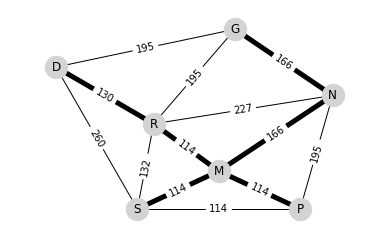

In [17]:
weighted_elist = [('D','G',195), ('D','R',130), ('D','S',260), 
                  ('G','R',195), ('G','N',166), ('R','S',132),
                  ('R','M',114), ('R','N',227), ('M','S',114),
                  ('M','P',114), ('M','N',166), ('N','P',195),
                  ('P','S',114)]
p = {'D': (0,15),'G':(11,19),'N':(17,12),'R':(6,9),'M':(10,4),
     'P':(15,0), 'S':(5,0)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

mst = prim(G)
nx.draw_networkx(G, pos=p, node_color='lightgrey',
                 node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()

# 木とグラフ探索

### コード4.3（p. 111）

In [18]:
import collections
S = collections.deque()
S.append('a'); S.append('b')
print(S.pop())
S.append('c'); S.append('d'); S.append('e')
print(S.pop())
print(S)

b
e
deque(['a', 'c', 'd'])


### コード4.4（p. 112）

In [19]:
def dfs(G):
    V = [v for v in G.nodes()]
    start = V[0]
    S = collections.deque([start])
    flagged = {v:False for v in G.nodes()}
    T = []
    while len(S) != 0:
        t = S[-1] # stackの１番上の値を参照
        flagged[t] = True
        edges = [(u,v) for (u,v) in G.edges(t)
                 if not(flagged[v])]
        if edges != []:
            (u,v) = edges[0]
            S.append(v)
            T.append((u,v))
        else:
            S.pop()
    return T

### 深さ優先探索木の例（p. 112）

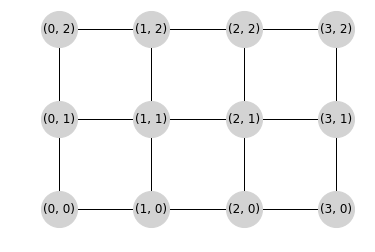

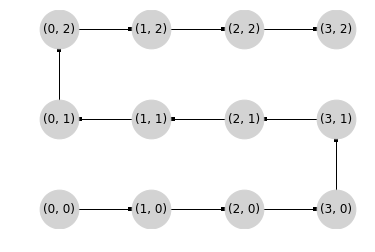

In [20]:
G=nx.grid_2d_graph(4,3)
p={v:v for v in G.nodes()}
nx.draw_networkx(G, pos=p, node_color='lightgrey',node_size=1300,
        with_labels=True)
plt.axis('off')
plt.show()

dfst = dfs(G)
DG = nx.DiGraph()
DG.add_edges_from(dfst)
nx.draw_networkx(DG, edgelist=dfst, pos=p, node_color='lightgrey',
        node_size=1500, with_labels=True)
plt.axis('off')
plt.savefig('../fig3/grid43dfs.eps')
plt.show()

### デックによるキューの実現（p. 114）

In [21]:
Q = collections.deque()
Q.append('a'); Q.append('b')
print(Q.popleft())
Q.append('c'); Q.append('d'); Q.append('e')
print(Q.popleft()); print(Q)

a
b
deque(['c', 'd', 'e'])


### ヒープの例（p. 119）

In [22]:
import heapq
h = []
heapq.heappush(h, 3); heapq.heappush(h, 5)
heapq.heappush(h, 1); heapq.heappush(h, 4)
heapq.heappush(h, 2); 
print(h)
heapq.heappop(h)
print(h)

[1, 2, 3, 5, 4]
[2, 4, 3, 5]


# 4.3.1 最短路問題

### コード4.5，ダイクストラ法（p. 123）

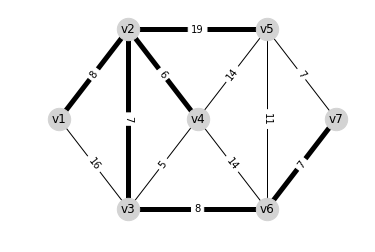

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

weighted_elist = [('v1','v2',8), ('v1','v3',16), ('v2','v3',7), 
                  ('v2','v4',6), ('v2','v5',19), ('v3','v4',5),
                  ('v3','v6',8), ('v4','v5',14), ('v4','v6',14),
                  ('v5','v6',11), ('v5','v7',7), ('v6','v7',7)]
p = {'v1': (0,1),'v2':(1,2),'v3':(1,0),'v4':(2,1),'v5':(3,2),
     'v6':(3,0), 'v7':(4,1)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

s = 'v1'
nodes = set(G.nodes())-{s}
T = set({})
for v in nodes:
    sp = nx.dijkstra_path(G,s,v)
    T=T.union({tuple(x) for x in np.array([sp[:-1],sp[1:]]).T})
T = list(T)

nx.draw_networkx(G, pos=p, node_color='lightgrey',
                 node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=T, width=5)
nx.draw_networkx_edge_labels(G, pos=p,edge_labels=elbs)
plt.axis('off')
plt.show()

# 4.3.2 オイラー閉路と郵便配達人問題

### オイラーグラフの判定（p. 126）

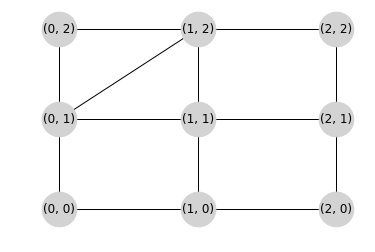

False

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
GR = nx.grid_2d_graph(3,3)
GR.add_edges_from([((0,1),(1,2))])
nx.draw_networkx(GR,pos={v:v for v in GR.nodes()},
        node_color='lightgrey', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

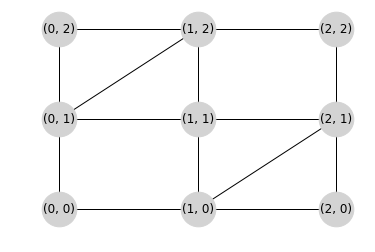

True

In [25]:
GR.add_edges_from([((1,0),(2,1))])
nx.draw_networkx(GR,pos={v:v for v in GR.nodes()},
        node_color='lightgrey', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

In [26]:
ee = nx.eulerian_circuit(GR)
for (i,j) in ee:
    print(i, end='->')

(0, 0)->(0, 1)->(1, 2)->(2, 2)->(2, 1)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(1, 0)->(2, 1)->(2, 0)->(1, 0)->

### 郵便配達人問題の問題の生成（p. 128）

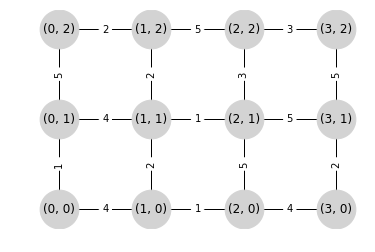

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

np.random.seed(1000)

G = nx.grid_2d_graph(4,3)
for (u,v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1,6)

nx.draw_networkx(G, pos={v:v for v in G.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(G,
    edge_labels={(u,v):G[u][v]['weight'] for (u,v) in G.edges()},
    pos={v:v for v in G.nodes()})
plt.axis('off')
plt.show()

### 奇点からなる完全グラフの生成（pp. 128-129）

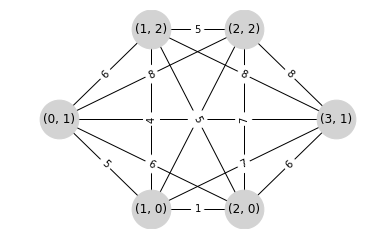

In [28]:
from itertools import combinations

# すべての奇点間の最短路の長さを計算
# dist[vodd1][vodd2] に計算されている．
Vodd = [v for v in G.nodes() if G.degree(v)%2 == 1]
dist = dict(nx.all_pairs_dijkstra_path_length(G))

K = nx.Graph()
K.add_weighted_edges_from([(u,v,dist[u][v])
                           for (u,v) in combinations(Vodd,2)])
nx.draw_networkx(K,pos={v:v for v in K.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(K,pos={v:v for v in K.nodes()},
    edge_labels={(u,v):K[u][v]['weight'] for (u,v) in K.edges()})
plt.axis('off')
plt.show()

### 重み最小完全マッチング（pp. 128-129）

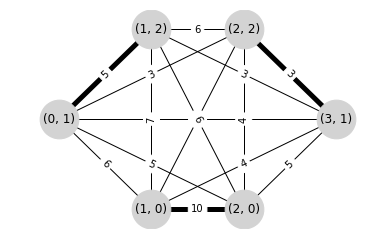

In [29]:
# 修正を加えた
CK = K.copy()
wm = max(CK[u][v]['weight'] for (u,v) in CK.edges())
for (u,v) in K.edges():
    CK[u][v]['weight'] = wm - CK[u][v]['weight']+1
m = nx.max_weight_matching(CK,maxcardinality=True)
md = dict(m)
mm = []
for (u, v) in md.items():
    if (u,v) not in mm and (v,u) not in mm:
        mm.append((u,v))

nx.draw_networkx(CK,pos={v:v for v in CK.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(CK,pos={v:v for v in CK.nodes()},
    edge_labels={(u,v):CK[u][v]['weight'] for (u,v) in CK.edges()})
nx.draw_networkx_edges(CK,pos={v:v for v in CK.nodes()},edgelist=mm, width=5)
plt.axis('off')
#plt.savefig('../fig/postmank6matching.eps')
plt.show()

### オイラー閉路の構築

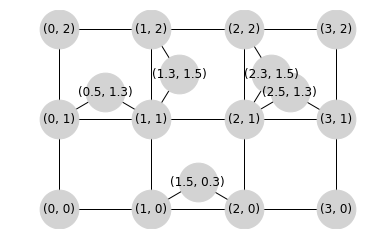

In [30]:
CG = G.copy()
for (u,v) in mm:
    dp = nx.dijkstra_path(CG,u,v)
    for i in range(len(dp)-1):
        (ux,uy) = dp[i]
        (vx,vy) = dp[i+1]
        if ux == vx:
            wx = ux+0.3
            wy = (uy+vy)/2.0
        else:
            wx = (ux+vx)/2.0
            wy = uy+0.3
        CG.add_edges_from([((ux,uy), (wx,wy)), ((wx,wy), (vx,vy))])
        
nx.draw_networkx(CG,pos={v:v for v in CG.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
plt.axis('off')
plt.show()

In [31]:
ec = nx.eulerian_circuit(CG)
for (i,j) in ec:
    print(i, end='->')

(0, 0)->(0, 1)->(0.5, 1.3)->(1, 1)->(1.3, 1.5)->(1, 2)->(2, 2)->(2.3, 1.5)->(2, 1)->(2.5, 1.3)->(3, 1)->(3, 2)->(2, 2)->(2, 1)->(2, 0)->(1.5, 0.3)->(1, 0)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(2, 1)->(3, 1)->(3, 0)->(2, 0)->(1, 0)->

# 4.3.3 ハミルトン閉路とTSP

### コード4.6，IPソルバーによる厳密解法（p. 135）

In [32]:
from pulp import *
from itertools import product
MEPS = 1.0e-10

def TSPSolveSubtourElim(G,x,y):
    n = len(G.nodes())
    nodes = list(G.nodes())
    edges = [(nodes[i],nodes[j]) for  (i,j) in product(range(n), range(n))
             if nodes[i] < nodes[j]]
    D = np.sqrt((x.reshape(-1,1)-x)**2 + (y.reshape(-1,1)-y)**2)

    prob = LpProblem('TSP',LpMinimize)

    x = {(u,v): LpVariable('x'+str(u)+","+str(v),
        lowBound=0,cat='Binary') for (u, v) in edges}
    prob += lpSum(D[i, j]*x[i, j] for (i,j) in edges)
    for i in nodes:
        ss = [(j,i) for j in nodes if (j,i) in edges]+[(i,j) for j in nodes if (i,j) in edges]
        prob += lpSum(x[e] for e in ss) == 2, 'Eq'+str(i)

    prob.solve()
    subtours = []
    for (i,j) in edges:
        if x[i,j].varValue > MEPS:
            subtours.append([i,j])
    G.add_edges_from(subtours)
    
    CC = list(nx.connected_components(G))
    while len(CC) > 1:
        for S in CC:
            prob += lpSum(x[i,j] for (i,j) in edges
                          if i in S and j in S) <= len(S)-1
        prob.solve()

        G.remove_edges_from(subtours)
        subtours = []
        for (i,j) in edges:
            if x[i,j].varValue > MEPS:
                subtours.append([i,j])
        G.add_edges_from(subtours)
        CC = list(nx.connected_components(G))
    
    len_tour = 0
    for (u,v) in G.edges():
        len_tour += D[u,v]

    return len_tour

### TSP求解の例（p. 136）

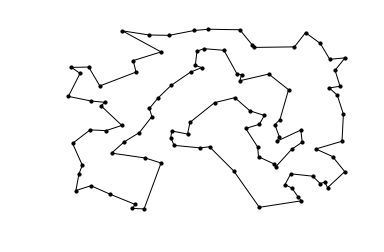

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# n点からなるグラフの作成
n = 100
vlist = [i for i in range(n)]
Tours = nx.Graph()
Tours.add_nodes_from(vlist)

np.random.seed(1234)
x = np.random.randint(low=0, high=1000, size=n)
y = np.random.randint(low=0, high=1000, size=n)
p = {i: (x[i],y[i]) for i in range(n)}

TSPSolveSubtourElim(Tours, x, y)
nx.draw_networkx(Tours,pos=p,node_color='k',node_size=10, with_labels=False)
plt.axis('off')
plt.show()

# 4.3.4 最大流，最小費用流問題

### 最大流問題，求解の例（pp. 138-139）

In [34]:
import networkx as nx
G = nx.DiGraph()
G.add_edge(1,2,capacity=4); G.add_edge(1,3,capacity=5); 
G.add_edge(2,3,capacity=2); G.add_edge(2,4,capacity=2); 
G.add_edge(3,4,capacity=2); G.add_edge(3,5,capacity=3); 
G.add_edge(4,5,capacity=4); G.add_edge(4,6,capacity=3); 
G.add_edge(5,6,capacity=5);

val, flowdict = nx.maximum_flow(G,1,6)
print('maxflow:', val)
for u,v in G.edges():
    print((u,v),':',flowdict[u][v])

maxflow: 7
(1, 2) : 2
(1, 3) : 5
(2, 3) : 0
(2, 4) : 2
(3, 4) : 2
(3, 5) : 3
(4, 5) : 1
(4, 6) : 3
(5, 6) : 4


### 最小カット問題

In [35]:
nx.minimum_cut(G,1,6)

(7, ({1, 2, 3}, {4, 5, 6}))

### 最小費用流問題の求解例（p. 141）

In [36]:
import networkx as nx
G = nx.DiGraph()
G.add_node('a', demand = -8); G.add_node('b', demand = 0);
G.add_node('c', demand = -2); G.add_node('d', demand = 10);
G.add_edge('a', 'b', weight = 3, capacity = 3)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 6)
G.add_edge('c', 'd', weight = 4, capacity = 10)
G.add_edge('c', 'b', weight = 2, capacity = 5)
flowDict = nx.min_cost_flow(G)
print(flowDict)

{'a': {'b': 3, 'c': 5}, 'b': {'d': 6}, 'c': {'d': 4, 'b': 3}, 'd': {}}


# 4.4.1 マッチング

### 最大マッチング，重み最大マッチング求解の例（pp. 143-144）

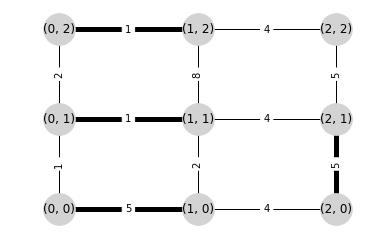

In [37]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.grid_2d_graph(3,3)
for (u,v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1,10)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
pos = {v: v for v in G.nodes()}

M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
MW = set(mw.items())

nx.draw_networkx(G, pos=pos,node_color='lightgrey',
                 node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=M, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)
plt.axis('off')
plt.show()

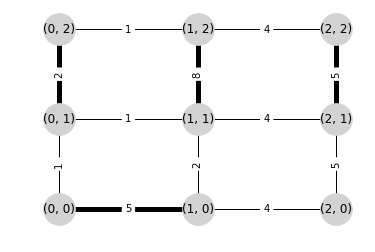

In [38]:
nx.draw_networkx(G, pos=pos,node_color='lightgrey',node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=MW, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)
plt.axis('off')
plt.show()

# 4.4.2 辺彩色問題

### コード4.7，整数線形最適化問題としての辺彩色問題の解法（p. 148）

In [39]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from pulp import *
import itertools
MEPS = 1.0e-8

def edge_coloring(G):
    delta = max([G.degree(v) for v in G.nodes()])
    k = delta
    solved = False
    
    while not(solved) and k <= delta+1:
        prob = LpProblem(name='Edge_Coloring_by_PuLP', sense=LpMinimize)
    
        x = {(e,i): LpVariable('x'+str(e)+str(',')+str(i),lowBound=0,cat='Binary')
             for e in  G.edges() for i in range(k)}

        prob +=  0     # 目的関数
        for e in G.edges:
            prob += lpSum(x[(e,i)] for i in range(k)) == 1
        
        for (u,i) in itertools.product(G.nodes(), range(k)):
            el = [tuple(sorted((u,v))) for v in G.neighbors(u)]
            prob += lpSum(x[(e,i)] for e in el) <= 1

        prob.solve()
        if LpStatus[prob.status] == 'Optimal':
            solved =True
        else:
            k += 1

    if solved:
        print('Edge '+str(k)+' coloring found:')
        coloring = {i: [e for e in  G.edges if x[(e,i)].varValue > MEPS] for i in range(k)}
        print(coloring)
    else:
        print("Error:")

In [40]:
G=nx.Graph()
elist = [(1,2),(3,1),(1,4),(4,2), (2,5), (4,3),(3,5)]
G.add_edges_from(elist)
edge_coloring(G)

Edge 4 coloring found:
{0: [(1, 3), (2, 4)], 1: [(1, 2), (3, 5)], 2: [(1, 4)], 3: [(2, 5), (3, 4)]}


In [41]:
K5=nx.complete_graph(5)
edge_coloring(K5)

Edge 5 coloring found:
{0: [(0, 3), (1, 2)], 1: [(1, 4), (2, 3)], 2: [(0, 1), (2, 4)], 3: [(0, 4), (1, 3)], 4: [(0, 2), (3, 4)]}


# 点彩色と彩色多項式

### コード4.8，Welsh-Powellのアルゴリズム（p. 152）

In [42]:
import networkx as nx
import collections

def welsh_powell(G):
    delta = max([G.degree(v) for v in G.nodes()])
    sv = collections.deque([v for (v,d) in
        sorted(G.degree(), key=lambda x: x[1])])
    nbcols = {v: set([]) for v in sv}
    
    cset = set(range(delta+1))
    c = min(cset)
    u = sv.pop()
    colors = {u: c}
    for v in G.neighbors(u):
        nbcols[v].update({c})
    cls = {c}
    while len(sv) > 0:
        u = sv.pop()
        c = min(cset-nbcols[u])
        colors[u] = c
        cls.update({c})
        for v in G.neighbors(u):
            nbcols[v].update({c})

    print('Node '+str(len(cls))+' coloring found.')

In [43]:
welsh_powell(G)

Node 3 coloring found.


### 整数線形最適化問題としての点彩色問題の解法（pp. 153-154）

In [44]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from pulp import *
import itertools
MEPS = 1.0e-8

def node_coloring_by_PuLP(G):
    delta = max([G.degree(v) for v in G.nodes()])+1
    
    prob = LpProblem(name='Node_Coloring_by_PuLP', sense=LpMinimize)
    y = {k: LpVariable('y'+str(k), lowBound=0, cat='Binary') for k in range(delta)}
    x = {(i, k): LpVariable('x'+str(i)+str(',')+str(k), lowBound=0, cat='Binary')
             for i in  G.nodes() for k in range(delta)}
    
    prob += lpSum(y[k] for k in range(delta)) # 目的関数
    
    for i,k in itertools.product(G.nodes(), range(delta)):
        prob += x[i,k] <= y[k]
    for (i,j), k in itertools.product(G.edges(), range(delta)):
        prob += x[i,k]+x[j,k] <= 1
    for i in G.nodes():
        prob += lpSum(x[i,k] for k in range(delta)) == 1
    
    prob.solve()
    if LpStatus[prob.status] == 'Optimal':
        print('Node '+str(int(value(prob.objective)))+' coloring found.')
    else:
        print("Error:")

In [45]:
node_coloring_by_PuLP(G)

Node 3 coloring found.


In [46]:
import random
random.seed(1)
G = nx.random_geometric_graph(50,0.3)
print('Number of nodes: ',len(G.nodes()))
print('Number of edges: ',len(G.edges()))
print('Welsh_Powell: ', end=''); welsh_powell(G)
print('By PuLP: ',end=''); node_coloring_by_PuLP(G)

Number of nodes:  50
Number of edges:  251
Welsh_Powell: Node 9 coloring found.
By PuLP: Node 8 coloring found.
